<a href="https://colab.research.google.com/github/Kapi2910/GitHubTut/blob/master/MLNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 9.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ddce3b1a44fd6c154d3decfa8daaee03efb58681aadcd27b9ae0ef9811880417
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
%matplotlib inline
import numpy as npy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import mglearn
from scipy import sparse


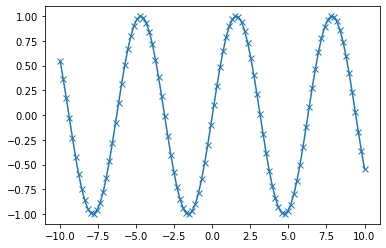

In [ ]:
x = npy.linspace(-10, 10, 100)
y = npy.sin(x)

plt.plot(x, y, marker="x")


In [ ]:
data = {
    'Name': ["John", "Aaditya", "Zain", "Prathibha"],
    'Location': ["NITW", "B'lore", "CND", "VZG"],
    'Age': [19, 18, 21, 19]
}

data_pandas = pd.DataFrame(data)

display(data_pandas)

,Name,Location,Age
0,John,NITW,19
1,Aaditya,B'lore,18
2,Zain,CND,21
3,Prathibha,VZG,19


In [ ]:
display(data_pandas[data_pandas.Age < 20 ])

,Name,Location,Age
0,John,NITW,19
1,Aaditya,B'lore,18
3,Prathibha,VZG,19


In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of the iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of the iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print("Target Names: \n{}".format(iris_dataset['target_names']))
print("Feature Names: \n{}".format(iris_dataset['feature_names']))
print("Target: \n{}".format(iris_dataset['target']))

Target Names: 
['setosa' 'versicolor' 'virginica']
Feature Names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("\nX_train Shape: \n{}".format(X_train.shape))
print("\ny_train Shape: \n{}".format(y_train.shape))


X_train Shape: 
(112, 4)

y_train Shape: 
(112,)


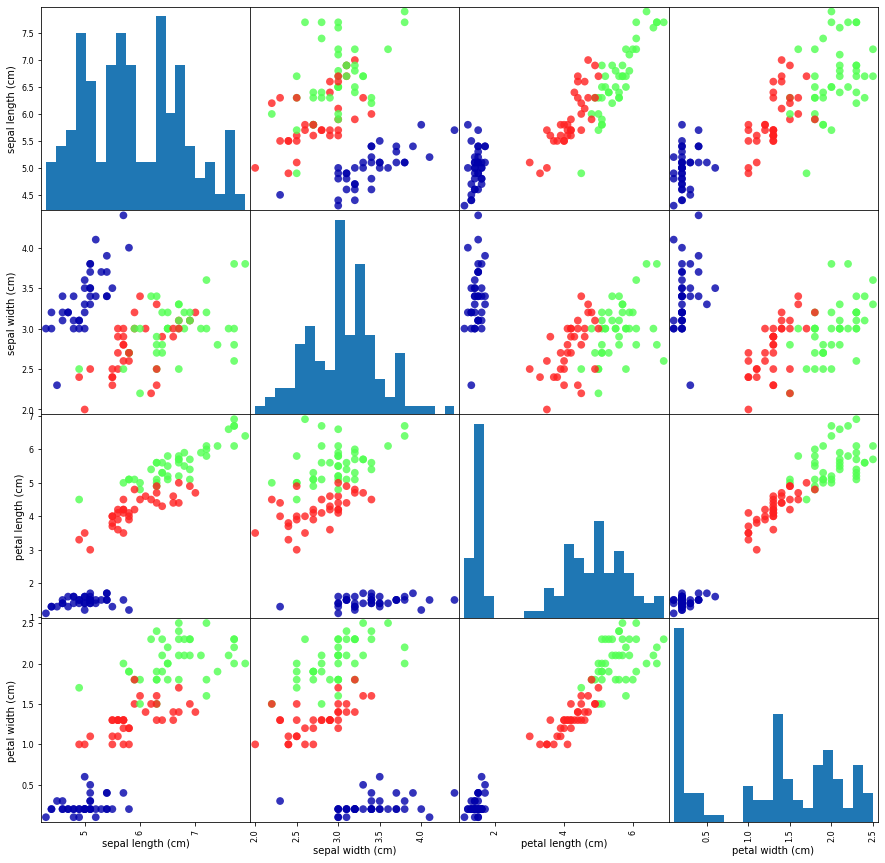

In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
scatMat = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15.0, 15.0), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

NameError: name 'knn' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Example 1 of KNeighborClassifier
y_pred = knn.predict(X_test)
print("Prediction: \n{}".format(y_test))
print("\nPrediction: \n{}".format(y_pred))
print("\nModel Accuracy = {}".format(npy.mean(y_pred == y_test)))

Prediction: 
[1 0 1 0 1 1 0]

Prediction: 
[1 0 1 0 1 0 0]

Model Accuracy = 0.8571428571428571


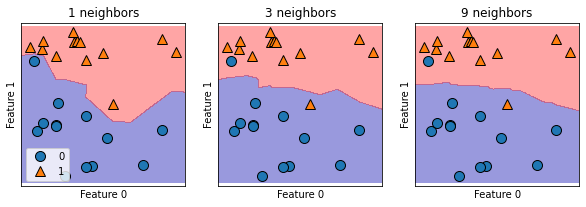

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knnClass = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knnClass, X, fill=True, eps=0.25, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

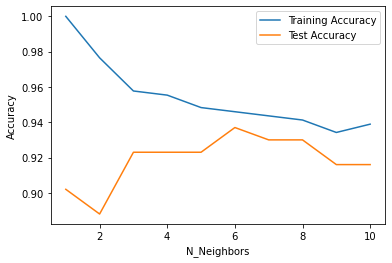

In [ ]:
#Example 2 of KNeighborClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbor_range = range(1, 11)

for nn in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbor_range, training_accuracy, label="Training Accuracy")
plt.plot(neighbor_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N_Neighbors")
plt.legend()

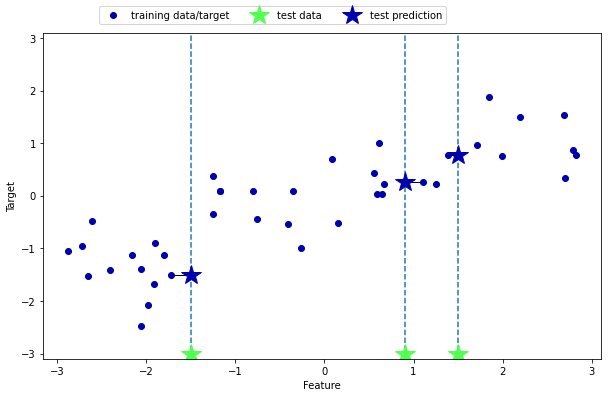

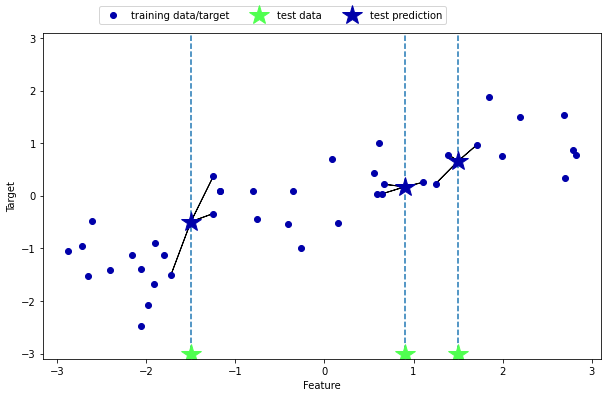

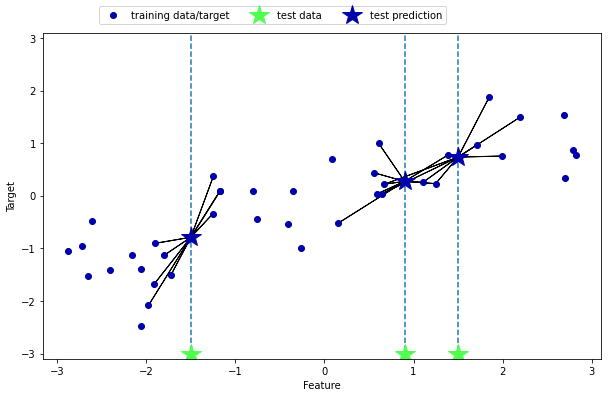

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [ ]:
#KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


regr = KNeighborsRegressor(n_neighbors=3)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("\nPrediction: {}".format(y_pred))
print("\nAccuracy: {}".format(regr.score(X_test, y_test)))


Prediction: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Accuracy: 0.8344172446249605


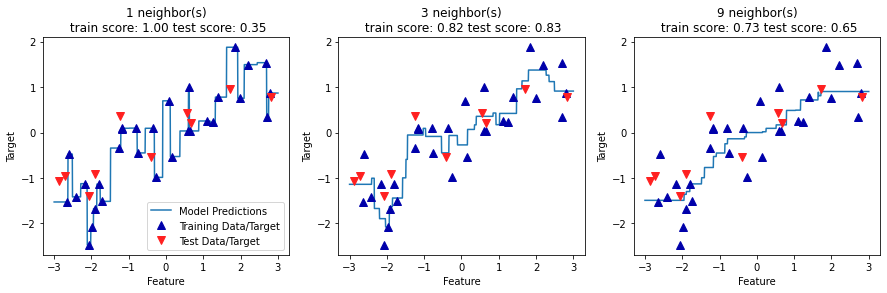

In [ ]:
#Analysis of KNeighborRegression
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = npy.linspace(-3, 3, 1000).reshape(-1, 1)

for nn, ax in zip([1, 3, 9], axes):
    regr = KNeighborsRegressor(n_neighbors=nn)
    regr.fit(X_train, y_train)

    ax.plot(line, regr.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}"
        .format(
            nn, regr.score(X_train, y_train), regr.score(X_test, y_test)
        )
    )
    ax.set_ylabel("Target")
    ax.set_xlabel("Feature")

axes[0].legend(["Model Predictions", "Training Data/Target", "Test Data/Target"], loc="best")

w[0]: 0.393906  b: -0.031804


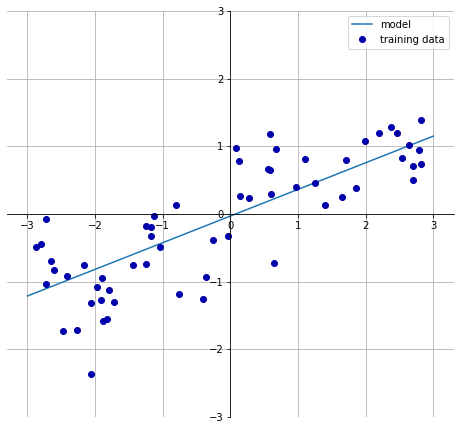

In [ ]:
#Linear Model
mglearn.plots.plot_linear_regression_wave()

In [ ]:
#Linear Regression: Example 1 - Wave
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

line_regr=LinearRegression().fit(X_train, y_train)

print("Line Weight: {}".format(line_regr.coef_)) #weight/coeff/slope is NumPy array that has 1 value per input feature
print("Line Intercept: {}".format(line_regr.intercept_))#intercept is a float value 

Line Weight: [0.39390555]
Line Intercept: -0.031804343026759746


In [ ]:
#Linear Regression: Accuracy in Example 1 
print("Training Score : {:.2f}".format(line_regr.score(X_train, y_train)))
print("Test Score: {:.2f}".format(line_regr.score(X_test, y_test)))


Training Score : 0.67
Test Score: 0.66


In [ ]:
#Linear Regression: Example 2- Boston Housing
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

line_regr =  LinearRegression().fit(X_train, y_train)

In [ ]:
#Linear Regression: Accuracy in Example 2 
print("Training Score : {:.2f}".format(line_regr.score(X_train, y_train)))
print("Test Score: {:.2f}".format(line_regr.score(X_test, y_test)))


Training Score : 0.95
Test Score: 0.61


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training Score : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge.score(X_test, y_test)))



Training Score : 0.89
Test Score: 0.75


In [ ]:
#Ridge with alpha 10
ridge10 = Ridge().fit(X_train, y_train)
print("Training Score : {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training Score : 0.89
Test Score: 0.75


In [ ]:

ridge01 = Ridge(.1).fit(X_train, y_train)
print("Training Score : {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test Score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training Score : 0.93
Test Score: 0.77


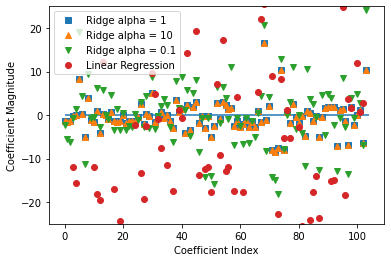

In [ ]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1" )

plt.plot(line_regr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(line_regr.coef_))
plt.ylim(-25, 25)
plt.legend()


1
